In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\heart.csv')

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df['old'].sum()

79

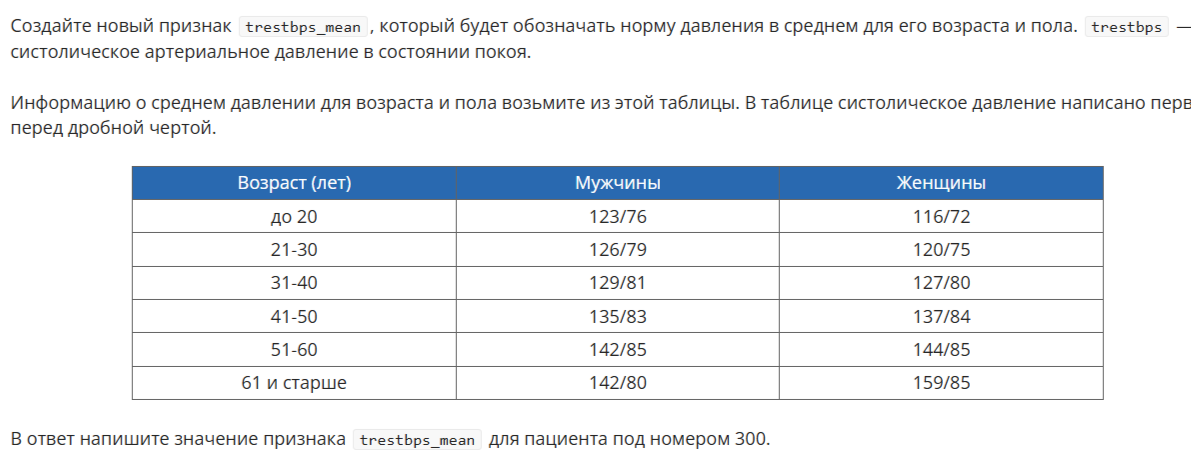

In [78]:
df['trestbps_mean'] = 0
for index, row in df.iterrows():
    if row['sex'] == 1:
        if row['age'] <= 20:
            df.loc[index, 'trestbps_mean'] = 123
        elif 21 < row['age'] <= 30:
            df.loc[index, 'trestbps_mean'] = 126
        elif 31 < row['age'] <= 40:
            df.loc[index, 'trestbps_mean'] = 129
        elif 41 < row['age'] <= 50:
            df.loc[index, 'trestbps_mean'] = 135
        elif 51 < row['age'] <= 60:
            df.loc[index, 'trestbps_mean'] = 142
        else:
            df.loc[index, 'trestbps_mean'] = 142
    else:
        if row['age'] <= 20:
            df.loc[index, 'trestbps_mean'] = 116
        elif 21 < row['age'] <= 30:
            df.loc[index, 'trestbps_mean'] = 120
        elif 31 < row['age'] <= 40:
            df.loc[index, 'trestbps_mean'] = 127
        elif 41 < row['age'] <= 50:
            df.loc[index, 'trestbps_mean'] = 137
        elif 51 < row['age'] <= 60:
            df.loc[index, 'trestbps_mean'] = 144
        else:
            df.loc[index, 'trestbps_mean'] = 159
        
            
            

In [79]:
df.iloc[300]

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

In [80]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,159
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [81]:
import category_encoders as ce
ord_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
type = ord_encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df = pd.concat([df, type], axis=1)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [82]:
df.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


<Axes: xlabel='age', ylabel='Density'>

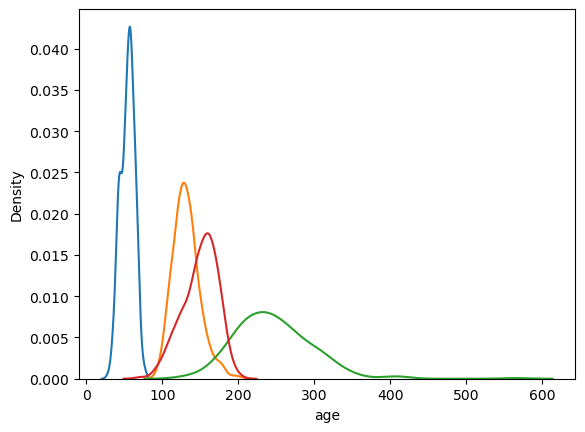

In [83]:
sns.kdeplot(df['age'])
sns.kdeplot(df['trestbps'])
sns.kdeplot(df['chol'])
sns.kdeplot(df['thalach'])

<Axes: xlabel='oldpeak', ylabel='Density'>

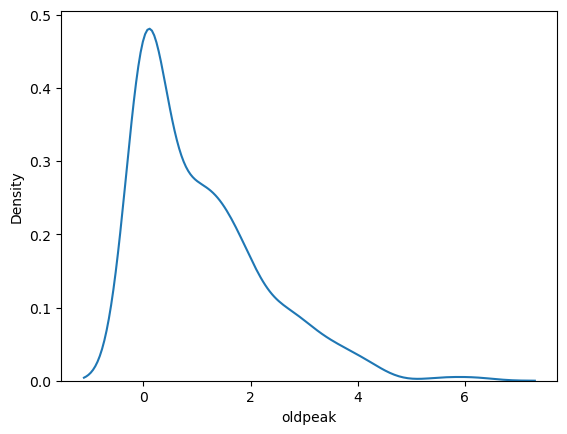

In [84]:
sns.kdeplot(df['oldpeak'])

In [85]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


In [95]:
from sklearn import preprocessing
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_scaled = df.copy()
scaler = preprocessing.RobustScaler()
df_scaled[num] = scaler.fit_transform(df[num])
df_scaled

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,1,0.75,-0.110236,1,-0.092308,0,0.9375,1,1,...,0,1,0,0,0,0,1,0,0,0
1,-1.333333,1,0.00,0.157480,0,1.046154,0,1.6875,1,0,...,0,1,0,0,0,0,0,1,0,0
2,-1.037037,0,0.00,-0.566929,0,0.584615,0,0.3750,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.074074,1,-0.50,-0.062992,0,0.769231,0,0.0000,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.148148,0,-0.50,1.795276,0,0.307692,1,-0.1250,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0,0.50,0.015748,0,-0.923077,1,-0.3750,0,0,...,1,1,0,0,0,0,0,0,1,0
299,-0.740741,1,-1.00,0.377953,0,-0.646154,0,0.2500,0,0,...,1,1,0,0,0,0,0,0,1,0
300,0.962963,1,0.70,-0.740157,1,-0.369231,0,1.6250,0,1,...,1,0,1,0,0,0,0,0,1,0
301,0.148148,1,0.00,-1.716535,0,-1.169231,1,0.2500,0,0,...,1,0,0,1,0,0,0,0,1,0


In [96]:
df_scaled.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.683168,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,0.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.555556,0.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.444444,1.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.629630,1.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

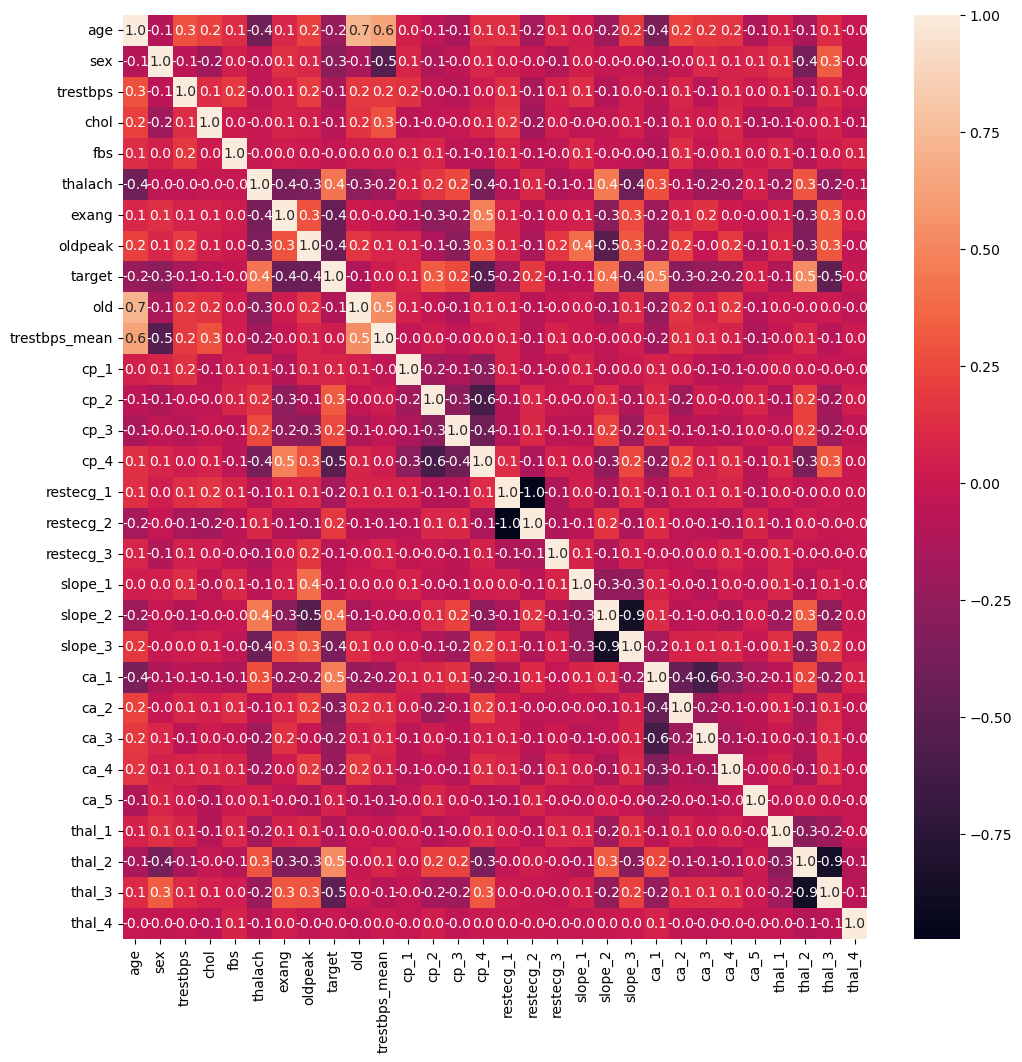

In [102]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.1f')